# Demonstrating NLTK Modin Interoperability

## All the examples in this section are taken / adapted from https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

In [1]:
import modin.pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
# Import some Tweets from Barack Obama 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets-obama.csv")
df.head(3)

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

2023-01-03 12:18:10,511	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8268 


,Unnamed: 0,created_at,id,author_id,text
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"It’s despicable, it’s dangerous — and it needs..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,We need to repudiate in the strongest terms th...
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,This weekend’s shootings in Buffalo offer a tr...


In [3]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...


In [4]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[it, s, despicable, it, s, dangerous, and, it,..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[we, need, to, repudiate, in, the, strongest, ..."
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[this, weekend, s, shootings, in, buffalo, off..."


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/labanyamukhopadhyay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [7]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician..."
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r..."


In [8]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb
1,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...
2,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...
3,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...
4,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/labanyamukhopadhyay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [11]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'need': 2, 'americans': 2, 'proud': 2, 'despicable': 1, 'dangerous': 1, 'needs': 1, 'stop': 1, '0ch2zosmhb': 1, 'repudiate': 1, 'strongest': 1, ...})

In [12]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb
1,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...
2,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...
3,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...
4,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...


In [13]:
#lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/labanyamukhopadhyay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/labanyamukhopadhyay/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [15]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [16]:
# show level count
df.is_equal.value_counts()

True    5
Name: is_equal, dtype: int64

In [17]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

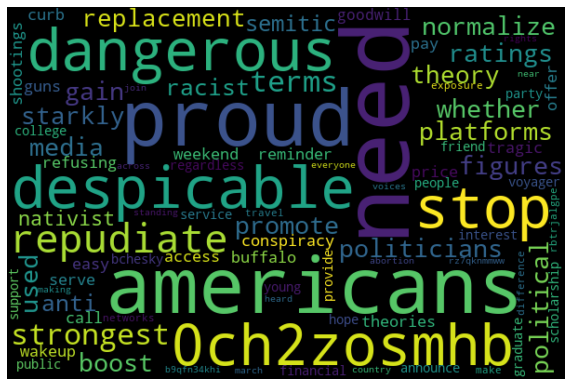

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');